## Simple Model

Include require libraries.

In [14]:
from keras import layers,models,optimizers
from keras.preprocessing.image import ImageDataGenerator

Original images are 720x480 but training using original dimensions will take a long time. Let's start off using 504x336 images.

In [15]:
IMAGE_WIDTH = 432
IMAGE_HEIGHT = 288

Defining a simple CNN using dropout.

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [17]:
TRAIN_DIR = '../data/train'
VALIDATION_DIR = '../data/test'

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
        batch_size=16,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
        batch_size=16,
        class_mode='binary')

Found 94 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


Training the model

In [19]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/5
50/50 [==============================] - 134s 3s/step - loss: 0.6323 - acc: 0.6614 - val_loss: 0.5841 - val_acc: 0.7247
Epoch 2/5
50/50 [==============================] - 132s 3s/step - loss: 0.5736 - acc: 0.7404 - val_loss: 0.5767 - val_acc: 0.7152
Epoch 3/5
50/50 [==============================] - 133s 3s/step - loss: 0.5345 - acc: 0.7430 - val_loss: 0.5489 - val_acc: 0.7595
Epoch 4/5
50/50 [==============================] - 132s 3s/step - loss: 0.4849 - acc: 0.7818 - val_loss: 0.4787 - val_acc: 0.7595
Epoch 5/5
50/50 [==============================] - 132s 3s/step - loss: 0.4676 - acc: 0.7897 - val_loss: 0.4654 - val_acc: 0.7975


In [13]:
from keras import backend

print(backend.image_data_format())


channels_last


In [10]:
model.save('simple_model_full.h5')

In [1]:
from keras.models import load_model

model = load_model('simple_model_full.h5')

Using TensorFlow backend.


In [2]:
model.save_weights('simple_model_weights.h5')

In [20]:
img_path = '../data/test/recyclable/photo_29b.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

print(img_tensor.shape)

(1, 288, 432, 3)


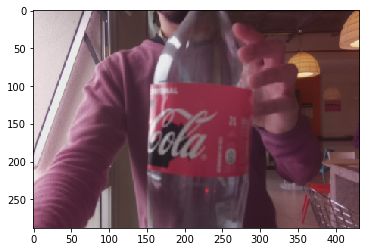

In [21]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [22]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [23]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 286, 430, 32)


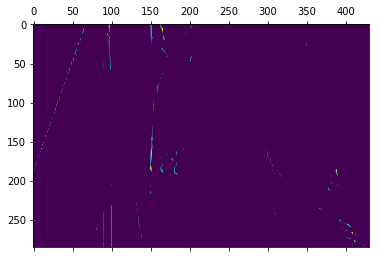

In [38]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

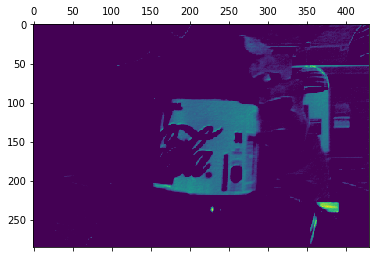

In [25]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

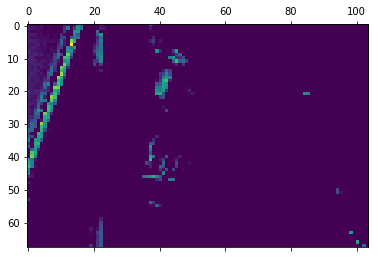

In [50]:
layer = activations[4]
plt.matshow(layer[0, :, :, 126], cmap='viridis')
plt.show()

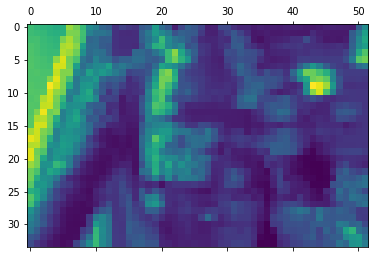

In [60]:
layer = activations[5]
plt.matshow(layer[0, :, :, 10], cmap='viridis')
plt.show()

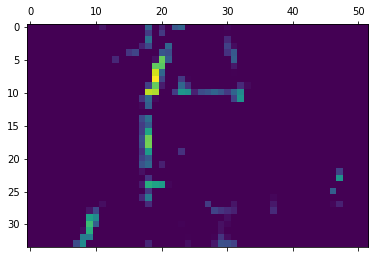

In [61]:
layer = activations[5]
plt.matshow(layer[0, :, :, 30], cmap='viridis')
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/25
50/50 [==============================] - 207s 4s/step - loss: 0.6393 - acc: 0.6577 - val_loss: 0.6313 - val_acc: 0.5981
Epoch 2/25
50/50 [==============================] - 206s 4s/step - loss: 0.5806 - acc: 0.6727 - val_loss: 0.6888 - val_acc: 0.4810
Epoch 3/25
50/50 [==============================] - 202s 4s/step - loss: 0.5376 - acc: 0.7466 - val_loss: 0.5779 - val_acc: 0.7595
Epoch 4/25
50/50 [==============================] - 196s 4s/step - loss: 0.5016 - acc: 0.7721 - val_loss: 0.5099 - val_acc: 0.8006
Epoch 5/25
37/50 [=====================>........] - ETA: 46s - loss: 0.4541 - acc: 0.8038